# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.9.2'

In [3]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

11490434/11490434 [==============================] - 0s 0us/step


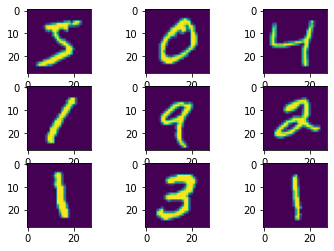

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

## Build and train the model

Build and train your model. 

In [5]:
# TODO: Build your model
# reshape dataset to have a single channel # TODO why??
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
print(X_train_full.shape)

# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0
print(X_train_full.shape)

# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [6]:
model = keras.models.Sequential([

    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same", input_shape=[28, 28, 1]),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),

    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"), 
    keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_initializer='he_uniform', padding="same"),
    keras.layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    
    keras.layers.Flatten(), # starting fully connected layers
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        3

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [8]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    batch_size=64, epochs=20, 
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/20
860/860 [==============================] - 399s 462ms/step - loss: 0.2429 - accuracy: 0.9273 - val_loss: 0.0906 - val_accuracy: 0.9764
Epoch 2/20
860/860 [==============================] - 376s 437ms/step - loss: 0.0714 - accuracy: 0.9807 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 3/20
860/860 [==============================] - 368s 428ms/step - loss: 0.0502 - accuracy: 0.9865 - val_loss: 0.0500 - val_accuracy: 0.9880
Epoch 4/20
860/860 [==============================] - 365s 425ms/step - loss: 0.0442 - accuracy: 0.9881 - val_loss: 0.0683 - val_accuracy: 0.9846
Epoch 5/20
860/860 [==============================] - 365s 424ms/step - loss: 0.0338 - accuracy: 0.9907 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 6/20
860/860 [==============================] - 368s 428ms/step - loss: 0.0305 - accuracy: 0.9912 - val_loss: 0.0359 - val_accuracy: 0.9912
Epoch 7/20
860/860 [==============================] - 364s 424ms/step - loss: 0.0308 - accuracy: 0.9914 - val_loss: 0.0366 -

In [9]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        3

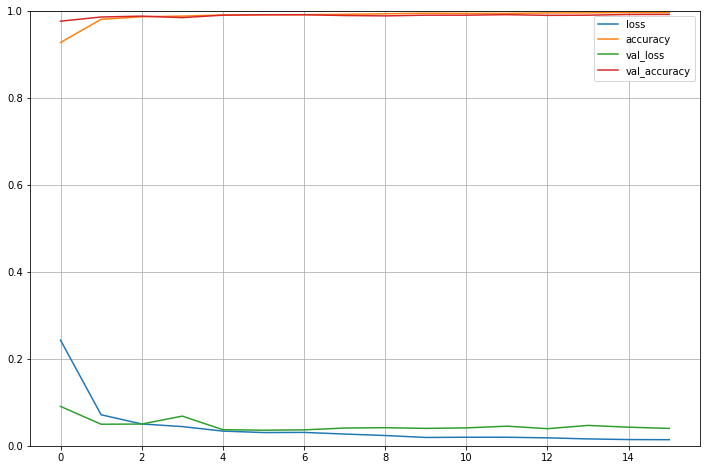

In [10]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [11]:
model.save('FDS22-M133-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [12]:
model = keras.models.load_model("FDS22-M133-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 16s 50ms/step - loss: 0.0271 - accuracy: 0.9922


[0.027137842029333115, 0.9922000169754028]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

**Explanation**
- The filter size is 3^2 because the dataset is small. (both 3^2 and 5^2 are suitable, but 9^2 is too large)
- The number of channels follows the trend:  32–64–128. I set a small figure at the beginning because it helps models capture details.
- The layer structure is in a conventional pattern: Conv-Conv-Pool-Conv-Conv-Pool.

**Difficulties**
- At first, the model was overfitting. I reduced the depth of CNN network to solve this problem.
